**Dependcies libraries**


*   Numpy
*   pandas

*   sklearn --> model_selection --> train_test_split
*   sklearn --> linear_model --> LogisticRegression

*   sklearn --> metrics --> accuracy_score








In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Dataset can directly call from the kaggle by creating token.
[Data](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [2]:
# installing kaggle in colab
! pip install -q kaggle

In [4]:
# uplaoding genrated token from the kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamsoni07","key":"9ccfc7d4f1c74625080c174e60678880"}'}

In [5]:
# making directory
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 # list of project files
 ! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02            896  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           9252  
piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                             850B  2022-03-09 08:53:28            721  
majyhain/height-of-male-and-female-by-country-2022               Height of Male and Female by Country 2022            4KB  2022-02-02 00:40:19           4506  
prasertk/netflix-subscription-price-in-d

In [8]:
# downloading dataset from the kaggle
! kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:00<00:00, 67.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 134MB/s] 


In [9]:
# unzipping the file
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [10]:
# loading data in pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [11]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# last 5 rows of the dataset
credit_card_data.tail() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The above dataset is highly unblance\

0 --> Nornmal Transication

1 --> Fraud Transication

In [16]:
# sperating the dataset for the data analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

Text(0, 0.5, 'Legit')

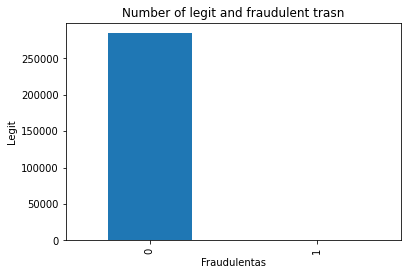

In [17]:
# Visualizing class
Class = pd.value_counts(credit_card_data['Class'])
Class.plot(kind = 'bar')
plt.title ("Number of legit and fraudulent trasn")
plt.xlabel ("Fraudulentas")
plt.ylabel ("Legit")


In [18]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
# let's do some stastical mesure
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
# camparing the values for the both classes
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under sampling

Building a sample dataset containing similar distribution of ligit and fraudulent dataset

In [22]:
# here fraudulent transication is 492, thus the ligit transication 492 data
legit_sample = legit.sample(n = 492)
# it it will genrate random  492 data from the sample set 

In [23]:
print(legit_sample.shape)

(492, 31)


Now concaneting two both dataset (legit_sample and fraud)

In [24]:
# concating dataset, here axis  =  0 mean adding data row wise
new_data = pd.concat([legit_sample,fraud], axis = 0)

In [25]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
229602,145986.0,1.948109,-0.007583,-1.869344,0.384222,0.302606,-1.007536,0.209751,-0.227401,0.383423,...,0.251366,0.751701,-0.109990,-0.403768,0.241055,-0.105208,-0.016792,-0.037051,49.32,0
266557,162382.0,-0.031690,0.651259,0.318348,-0.652219,0.295167,-0.921621,0.762598,0.038609,-0.036272,...,-0.220507,-0.590481,0.096265,0.021477,-0.590922,0.121071,0.230613,0.085052,2.68,0
169814,119873.0,2.122493,-0.693714,-1.059980,-0.532477,-0.915455,-1.048571,-0.909184,-0.134008,0.109147,...,0.243721,0.783513,0.111695,-0.119514,-0.176830,-0.084143,0.029593,-0.011908,21.99,0
199071,132796.0,1.987487,-0.836643,-0.558142,-0.680144,-1.101055,-0.956018,-0.722420,-0.028199,1.856522,...,0.174248,0.534473,0.176529,-0.062609,-0.420656,0.715965,-0.052648,-0.052327,36.00,0
151394,95484.0,-0.609445,1.732746,-0.347182,2.712824,1.847722,-0.215740,1.561128,-0.339380,-0.842276,...,0.040236,0.394312,-0.092194,-0.576031,0.208818,0.032112,-0.155524,0.060755,20.00,0


In [26]:
# new data shape
new_data.shape

(984, 31)

In [27]:
# now finding value count
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [28]:
# groupy data based on the class
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92093.304878,0.022670,-0.093710,0.027209,0.062134,0.053740,0.098435,-0.023059,0.089091,-0.027992,...,-0.016779,0.005650,0.002190,-0.029900,-0.040176,0.038760,0.006466,-0.020760,-0.011599,98.074390
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [29]:
# now let's create X(features) and Y(traget value)
X = new_data.drop('Class', axis = 1)
Y = new_data['Class']

In [30]:
print(X.shape, Y.shape)

(984, 30) (984,)


In [31]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
229602  145986.0  1.948109 -0.007583 -1.869344  0.384222  0.302606 -1.007536   
266557  162382.0 -0.031690  0.651259  0.318348 -0.652219  0.295167 -0.921621   
169814  119873.0  2.122493 -0.693714 -1.059980 -0.532477 -0.915455 -1.048571   
199071  132796.0  1.987487 -0.836643 -0.558142 -0.680144 -1.101055 -0.956018   
151394   95484.0 -0.609445  1.732746 -0.347182  2.712824  1.847722 -0.215740   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [32]:
print(Y)

229602    0
266557    0
169814    0
199071    0
151394    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Now split data train test split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2,stratify = Y, random_state = 1)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [35]:
print(Y.shape,Y_train.shape,Y_test.shape)

(984,) (787,) (197,)


Now let;s train our model by logistic regression

In [36]:
# traing model
model = LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

LogisticRegression()

Checking our model accuracy

In [38]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 1 1]


In [39]:
# now checking accuracy of the model
X_train_prediction =model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)

In [40]:
print('Training accuracy of the model: ',X_train_accuracy)

Training accuracy of the model:  0.9377382465057179


In [41]:
# now checking accuracy of the model
X_test_prediction =model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)

In [42]:
print('Testing accuracy of the model: ',X_test_accuracy)

Testing accuracy of the model:  0.9187817258883249


Saving model's weights

In [43]:
import joblib
joblib.dump(model,'credit_card_weight.dat')

['credit_card_weight.dat']

In [44]:
# making prediction with saved model
saved_model = joblib.load('/content/credit_card_weight.dat')
saved_model.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

Evaulating accuracy with confusion matrics

In [49]:

# here we used confusion metrics for calculating the quality of the model
# we can also calculate accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(X_test)

acc = accuracy_score(Y_test, np.round(preds))*100
cm = confusion_matrix(Y_test, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))


CONFUSION MATRIX ------------------
[[94  4]
 [12 87]]

TEST METRICS ----------------------
Accuracy: 91.87817258883248%
Precision: 95.6043956043956%
Recall: 87.87878787878788%
F1-score: 91.57894736842104
